In [1]:
import os
# Toggling between CPU and GPU
# GPU in use is NVIDIA GEFORCE 940M
# Theano backend is being used for keras
# To make the GPU unavailable, uncomment the line of code below
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from tensorflow.keras.callbacks import TensorBoard
file_name = 'my_save_model'
tensorboard = TensorBoard(log_dir="logs\\{}".format(file_name))

In [3]:
import tensorflow as tf
import time
import datetime, os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical

import sys,humanize,psutil,GPUtil

Using TensorFlow backend.


# Loading the CIFAR-100 dataset (CIFAR stands for Canadian Institute For Advanced Research)

## CIFAR-100 Dataset:
Similar to the CIFAR-10, this dataset comprises 100 classes with a total of 600 images. For each class, there are 500 training photos and 100 test images. The CIFAR-100's 100 classes are divided into 20 super classes. Each image has a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

The list of classes in the CIFAR-10 dataset are listed below:

![title](CIFAR100.png)

In [4]:
# Loading Dataset (CIFAR-10 dataset)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Model Buiding
LeNet = models.Sequential()

# Convolution 1: Filters as we know is 6. Filter size is 5x5, relu is the activation function
LeNet.add(layers.Conv2D(36, (5,5), activation = 'relu', input_shape=(32,32,3)))
# Subsampling 1: Input  = 32x32x6. Output = 14x14x6. SubSampling is simply MaxPooling so we use MaxPool (image reduction factor of 2)
LeNet.add(layers.MaxPooling2D((2,2)))

# Convolution 2: Input = 14x14x6. Output = 10x10x16 Conv2d
LeNet.add(layers.Conv2D(16, (5,5), activation='relu'))
# Subsampling 2: Input 32x32x6. Output = 14x14x6. SubSampling is simply MaxPooling so we use MaxPool (image reduction factor of 2)
LeNet.add(layers.MaxPooling2D((2,2)))

# Flatten for further steps to happen
# It is the process of converting all the resultant 2D arrays as single long continous linear vector
LeNet.add(layers.Flatten())

# Fully connected 1: Input = 5x5x16. Output = 120
LeNet.add(layers.Dense(120, activation='relu'))

# Fully connected 2: Input =120. Output = 84
LeNet.add(layers.Dense(84, activation='relu'))

# Final, Output and activation through softmax
LeNet.add(layers.Dense(100, activation='softmax'))
LeNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 36)        2736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        14416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
__________

In [6]:
# Compile
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Define function (For CPU) Memory Report
def cpu_mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))

  # Getting usage of cpu virtual_memory in GB
  print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)
  # Getting % usage of cpu virtual_memory
  print('CPU RAM % used: ', psutil.virtual_memory()[2])

In [8]:
# Define function (For GPU) Memory Report
def gpu_mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))

  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))

In [10]:
# Train model
t1 = time.time()

# Training for 10 epochs and a batch size of 10
history = LeNet.fit( train_images, train_labels, verbose=1, epochs = 10, batch_size = 10, validation_split = 0.2, callbacks=[tensorboard])
#model.fit(train_images[:20000], train_labels[:20000], epochs = , batch_size = 10)
t2 = time.time() 
print("Training Time: ", t2-t1)
#cpu_mem_report()
gpu_mem_report()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 178s 4ms/step - loss: 4.0667 - acc: 0.0717 - val_loss: 3.8118 - val_acc: 0.1122
Epoch 2/10
40000/40000 [==============================] - 38s 953us/step - loss: 3.5523 - acc: 0.1544 - val_loss: 3.5102 - val_acc: 0.1667
Epoch 3/10
40000/40000 [==============================] - 44s 1ms/step - loss: 3.3258 - acc: 0.1948 - val_loss: 3.3163 - val_acc: 0.2031
Epoch 4/10
40000/40000 [==============================] - 38s 956us/step - loss: 3.1855 - acc: 0.2219 - val_loss: 3.3329 - val_acc: 0.1978
Epoch 5/10
40000/40000 [==============================] - 43s 1ms/step - loss: 3.0873 - acc: 0.2381 - val_loss: 3.2174 - val_acc: 0.2194
Epoch 6/10
40000/40000 [==============================] - 39s 977us/step - loss: 3.0185 - acc: 0.2542 - val_loss: 3.1775 - val_acc: 0.2304
Epoch 7/10
40000/40000 [==============================] - 42s 1ms/step - loss: 2.9567 - acc: 0.2625 - val_loss: 3.1637 - 

In [11]:
# Evaluating the framework on the Test dataset
t1 = time.time()

_, acc = LeNet.evaluate(test_images, test_labels)
print("Accuracy = ", (acc*100.0), "%")

t2 = time.time() 
print("Testing Time: ", t2-t1)

10000/10000 [==============================] - 2s 223us/step
Accuracy =  24.63 %
Testing Time:  2.657031297683716


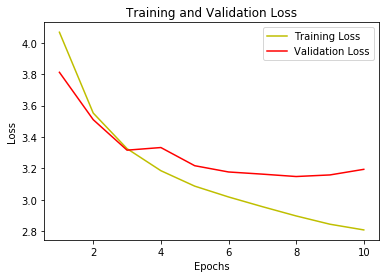

In [12]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

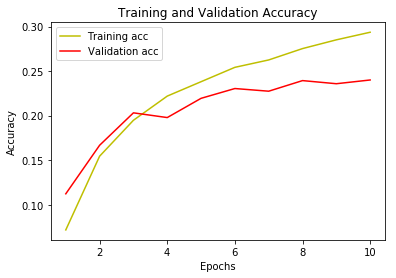

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc,'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()